In [71]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

In [72]:
happiness2015 = pd.read_csv('World_Happiness_2015.csv')

In [73]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [74]:
happiness2015_region = happiness2015.groupby('Region').mean(numeric_only=True)

In [75]:
# happiness2015_region = happiness2015.groupby('Region')[['Family','Happiness Score']].mean()

In [76]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return group.max() - group.mean()

happy_mean_max = happy_grouped.agg([np.mean,np.max])
mean_max_dif = happy_grouped.agg(dif)

/tmp/ipykernel_47535/980255771.py:6: FutureWarning: The provided callable <function mean at 0x72e0f4ee0f40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  happy_mean_max = happy_grouped.agg([np.mean,np.max])
/tmp/ipykernel_47535/980255771.py:6: FutureWarning: The provided callable <function max at 0x72e0f4ee0540> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  happy_mean_max = happy_grouped.agg([np.mean,np.max])


In [77]:
happy_mean_max

,mean,max
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


In [78]:
mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [79]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region')

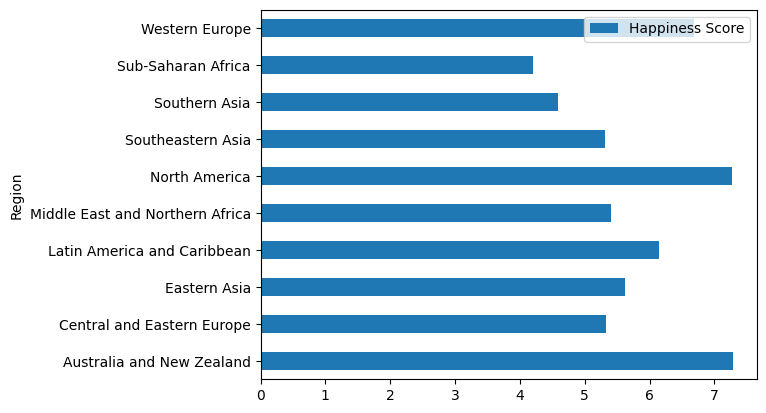

In [80]:
pv_happiness.plot(kind='barh')
plt.show()

In [81]:
happiness2015_region = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness2015_region

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [82]:
mean_min_max_by_region = happiness2015.pivot_table(values=['Family','Happiness Score' ], index='Region', aggfunc=[np.mean, np.min , np.max], margins=True)
mean_min_max_by_region

/tmp/ipykernel_47535/3025641369.py:1: FutureWarning: The provided callable <function mean at 0x72e0f4ee0f40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_min_max_by_region = happiness2015.pivot_table(values=['Family','Happiness Score' ], index='Region', aggfunc=[np.mean, np.min , np.max], margins=True)
/tmp/ipykernel_47535/3025641369.py:1: FutureWarning: The provided callable <function min at 0x72e0f4ee0680> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  mean_min_max_by_region = happiness2015.pivot_table(values=['Family','Happiness Score' ], index='Region', aggfunc=[np.mean, np.min , np.max], margins=True)
/tmp/ipykernel_47535/3025641369.py:1: FutureWarning: The provided callable <function max at 0x72e0f4ee0540> is currently 

mean                      min  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                     max                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587

In [ ]:
mean_min_max_by_region = happiness2015.pivot_table(values=['Family','Happiness Score' ], index='Region', aggfunc=[np.mean, np.min , np.max], margins=True)
mean_min_max_by_region

happy_family_stats = happiness2015.groupby('Region')[['Family','Happiness Score' ]].agg([np.mean, np.min, np.max])

/tmp/ipykernel_47535/1114321083.py:1: FutureWarning: The provided callable <function mean at 0x72e0f4ee0f40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  mean_min_max_by_region = happiness2015.pivot_table(values=['Family','Happiness Score' ], index='Region', aggfunc=[np.mean, np.min , np.max], margins=True)
/tmp/ipykernel_47535/1114321083.py:1: FutureWarning: The provided callable <function min at 0x72e0f4ee0680> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  mean_min_max_by_region = happiness2015.pivot_table(values=['Family','Happiness Score' ], index='Region', aggfunc=[np.mean, np.min , np.max], margins=True)
/tmp/ipykernel_47535/1114321083.py:1: FutureWarning: The provided callable <function max at 0x72e0f4ee0540> is currently 

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

In [85]:
happy_family_stats = happiness2015.groupby('Region')[['Family','Happiness Score' ]].agg([np.mean, np.min, np.max])

/tmp/ipykernel_47535/624058675.py:1: FutureWarning: The provided callable <function mean at 0x72e0f4ee0f40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  happy_family_stats = happiness2015.groupby('Region')[['Family','Happiness Score' ]].agg([np.mean, np.min, np.max])
/tmp/ipykernel_47535/624058675.py:1: FutureWarning: The provided callable <function min at 0x72e0f4ee0680> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  happy_family_stats = happiness2015.groupby('Region')[['Family','Happiness Score' ]].agg([np.mean, np.min, np.max])
/tmp/ipykernel_47535/624058675.py:1: FutureWarning: The provided callable <function max at 0x72e0f4ee0540> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be use